## Dark Net Capstone
This dataset contains Dark Net purchases made on the Agora marketplace from 2014 - 2015. First, it is important to
understand what the "Dark Net" or "Dark Web" means. The Dark Net is an overlay network that can only be accessed
with specific software or authorization. Marketplaces on this net specialize in illegal goods and services, such as drugs
computer hacking, and weapons sales. Goods and services are typically paid with the cryptocurrency bitcoin. 

This dataset was exported from Kaggle. I believe data is interestng on many levels. First, bitcoin has grown in popularity
recently with many known retailers accepting bitcoin as an alternate form of payment to cash and credit cards. 
However, bitcoin's origins are closely tied with the Dark Net and the illegal purchases made on its marketplaces with 
bitcoin being the medium of exchange. 
Secondly, the Dark Net is not a topic that is particularly mainstream and thus not particularly well known. Unlike
publically traded companies and stock market info, transactions on the Dark Net are not disclosed quarterly. I've been 
curious as to what exactly is sold on the Dark Net and how much people spend on it.

The data from Kaggle was somewhat dirty and has flaws. The price data in the dataset was originally
expressed all in bitcoin. For simplicity, I have converted the transactions to USD. 
At the start of 2014, the price of 1 bitcoin was approximately $750 USD. It must be noted that the price of bitcoin is 
highly volatile. As such, the USD prices shown may not be entirely accurate. Also, abnormally high prices will be excluded
as these prices could be faked or are wrong. 

Questions to answer: 1. What is purchased the most on the Dark Net? 2. What subcategories are purchased the most on the 
Dark Net? 3. What Vendor makes the most sales on the Dark Net?

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import scipy

## Dark Net Purchases made between 2014 - 2015
### What good/service is purchased the most on the Dark Net?

The following code will show what good or service was purchased the most on the Dark Net as well as the average sale price
and the highest priced sale in the data set

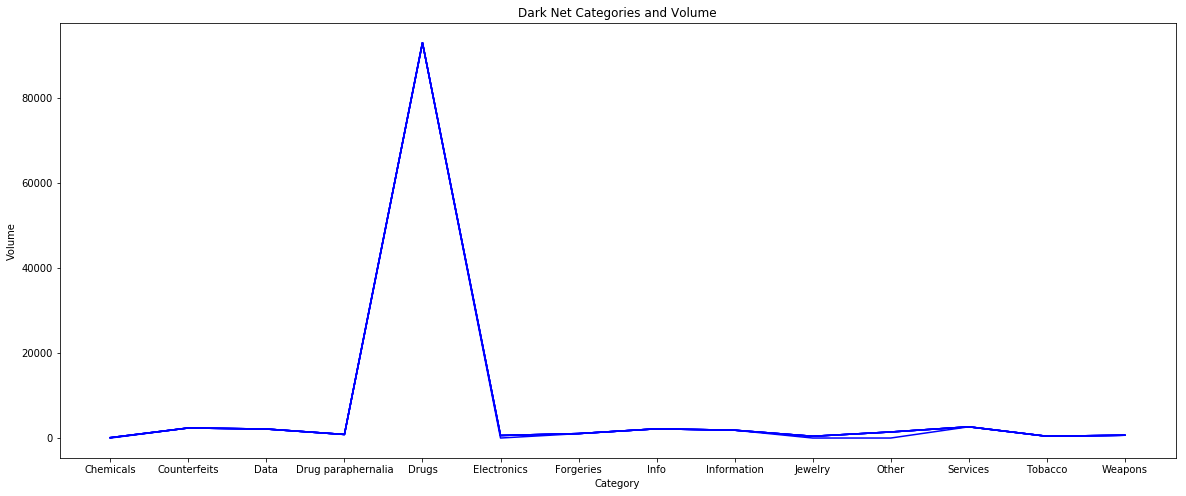

In [41]:
df = pd.read_csv('Darkweb_data_v7.csv')
plt.figure(figsize=(20,8))
plt.plot(df.groupby('SubCat 1').count(), color='blue')
plt.title('Dark Net Categories and Volume')
plt.ylabel('Volume')
plt.xlabel('Category')
plt.show()

In [42]:
Category = df['Category'].count()
Drug_Category = df.loc[lambda df: df['SubCat 1'] == 'Drugs', :].count()
print(Drug_Category.loc['Category'] / Category)

0.848279006155


In [43]:
df_drug = df.loc[lambda df: df['SubCat 1'] == 'Drugs', :]
df_drug['USD Price'].mean()

18737.102056319654

In [44]:
df_drug['USD Price'].max()

97797067.269999996

Findings: Drugs are the most purchased item on the Dark Net. In fact, looking at the data hollistically, there is a 85% chance that a good purchased on the Dark Net was a drug. The average sale price of all items sold is approximately 19K USD and the most expensive item sold in this data set was 97M USD.

## Drug Purchases 1K USD or less
### What type of drug was purchased most often?

The following code will show what the average drug sale price as well as what type of drugs were purchased the most on the Dark Net. Note: we are only analyzing drug purchases 1K USD or less in the attempt to remove outliers and erroneous data.

In [45]:
df2 = df_drug.loc[lambda df: df_drug['USD Price'] <= 1000, :]
df2['USD Price'].mean()

279.90429033577539

In [46]:
df2.groupby('SubCat2').count().sort_values(by=['USD Price'], ascending = False)

,Vendor,Category,SubCat 1,Price,Bitcoin Price,USD Price
SubCat2,,,,,,
Cannabis,22831,22831,22831,22831,22831,22831
Ecstasy,9229,9229,9229,9229,9229,9229
Stimulants,8723,8723,8723,8723,8723,8723
Psychedelics,6523,6523,6523,6523,6523,6523
Opioids,5108,5108,5108,5108,5108,5108
Prescription,4904,4904,4904,4904,4904,4904
Benzos,4203,4203,4203,4203,4203,4203
Steroids,2444,2444,2444,2444,2444,2444
RCs,1367,1367,1367,1367,1367,1367


In [47]:
drug_type = df2.groupby('SubCat2').sum()
drug_type.loc[:, 'USD Price'].head(n=3)

SubCat2
Barbiturates    6.331801e+03
Benzos          9.940419e+05
Cannabis        6.506321e+06
Name: USD Price, dtype: float64

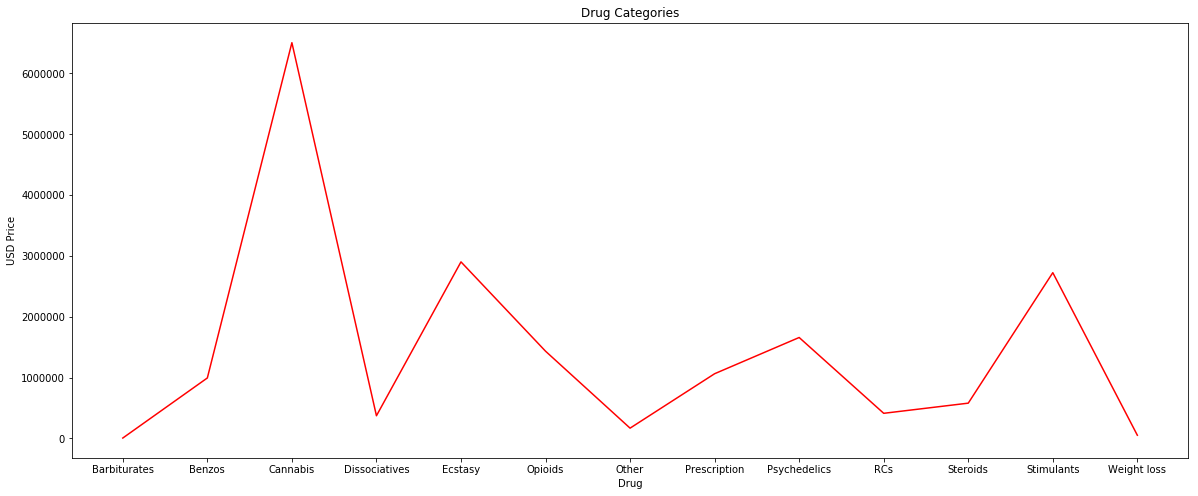

In [48]:
plt.figure(figsize=(20,8))
plt.plot(drug_type.loc[:, 'USD Price'], color='red')
plt.title('Drug Categories')
plt.ylabel('USD Price')
plt.xlabel('Drug')
plt.show()

Findings: Cannabis was the most purchased drug in terms of volume and overall sales. The top 3 purchased drugs by overall sales was Cannabis, Ecstasy, and Stimulants, in that order.

## Top 3 Drug Sales on the Dark Net
### What were the overall and average sales for the top 3 drugs sold on the Dark Net

The following code will show the total, mean, and standard deviations for the top 3 drugs sold on the Dark Net. Additionally, we will see the distribution of the top 3 drugs sold with histograms. Note: we are only analyzing drug purchases 1K USD or less in the attempt to remove outliers and erroneous data.

In [49]:
Cannabis = df2.loc[lambda df: df2['SubCat2'] == 'Cannabis', :]
Cannabis_sum = Cannabis['USD Price'].sum()
Cannabis_avg = Cannabis['USD Price'].mean()
print(Cannabis_sum)
print(Cannabis_avg)

Ecstasy = df2.loc[lambda df: df2['SubCat2'] == 'Ecstasy', :]
Ecstasy_sum = Ecstasy['USD Price'].sum()
Ecstasy_avg = Ecstasy['USD Price'].mean()
print(Ecstasy_sum)
print(Ecstasy_avg)

Stimulants = df2.loc[lambda df: df2['SubCat2'] == 'Stimulants', :]
Stim_sum = Stimulants['USD Price'].sum()
Stim_avg = Stimulants['USD Price'].mean()
print(Stim_sum)
print(Stim_avg)

6506321.11142
284.977491631
2902564.16917
314.504731734
2725010.62985
312.393744107


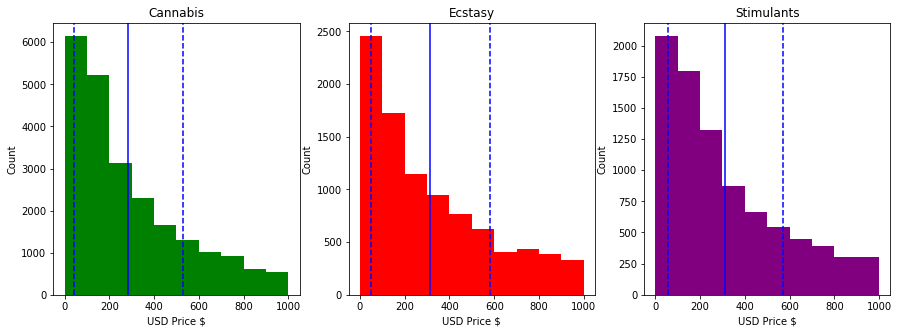

In [50]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
plt.hist(Cannabis['USD Price'], color = 'green')
plt.title('Cannabis')
plt.xlabel('USD Price $')
plt.ylabel('Count')
plt.axvline(Cannabis_avg, color = 'b', linestyle='solid')
plt.axvline(Cannabis_avg - Cannabis['USD Price'].std(), color = 'b', linestyle='dashed')
plt.axvline(Cannabis_avg + Cannabis['USD Price'].std(), color = 'b', linestyle='dashed')

plt.subplot(1,3,2)
plt.hist(Ecstasy['USD Price'], color = 'red')
plt.title('Ecstasy')
plt.xlabel('USD Price $')
plt.ylabel('Count')
plt.axvline(Ecstasy_avg, color = 'b', linestyle='solid')
plt.axvline(Ecstasy_avg - Ecstasy['USD Price'].std(), color = 'b', linestyle='dashed')
plt.axvline(Ecstasy_avg + Ecstasy['USD Price'].std(), color = 'b', linestyle='dashed')

plt.subplot(1,3,3)
plt.hist(Stimulants['USD Price'], color = 'purple')
plt.title('Stimulants')
plt.xlabel('USD Price $')
plt.ylabel('Count')
plt.axvline(Stim_avg, color = 'b', linestyle='solid')
plt.axvline(Stim_avg - Stimulants['USD Price'].std(), color = 'b', linestyle='dashed')
plt.axvline(Stim_avg + Stimulants['USD Price'].std(), color = 'b', linestyle='dashed')
plt.show()

Findings: Cannbis was the most bought drug on the dark net accounting for 6.5M USD and an average price of 284 USD. The average price of ecstacy was higher than that of Cannbis at 314 USD. Total Ecstasy sales equal 2.9M USD. Overall sales of stimulants were close to those of Ecstacy at 2.7M USD and an average sale price of 312 USD. Interesting that Cannabis is so widely popular on the dark net, total sales over 2x of Ecstasy sales.

Not surprisingy, most sales for all top 3 drugs were in the 0 - 200 USD range. 

## Cannabis Sales by Vendor 2014 - 2015
### What Vendor sold the most Cannabis on the Dark Net?

The following code will show what Vendor sold the most Cannabis in terms of volume and overall sales. Note: we are only analyzing drug purchases 1K USD or less in the attempt to remove outliers and erroneous data.

In [51]:
Vendor = Cannabis.groupby('Vendor').sum()
Vendor.sort_values(by=['USD Price'], ascending = False).head(n=3)

,Bitcoin Price,USD Price
Vendor,,
medibuds,186.662328,139996.745635
SAGreat,113.794212,85345.658838
BudMasterGeneral,107.575393,80681.544941


In [52]:
Vendor_count = Cannabis.groupby('Vendor').count()
Vendor_count.sort_values(by=['USD Price'], ascending = False).head(n=3)

,Category,SubCat 1,SubCat2,Price,Bitcoin Price,USD Price
Vendor,,,,,,
medibuds,487,487,487,487,487,487
StrattonOakmont,268,268,268,268,268,268
BudMasterGeneral,268,268,268,268,268,268


In [53]:
Vendor_count.loc['medibuds', 'Category'] / Cannabis['USD Price'].count()

0.021330646927423241

Findings: The Vendor Medibuds sold the most Cannabis in 2014 - 2015 in terms of overall volume and overall sales. Medibuds sold 140K USD in Cannabis and had 487 total transactions. Medibuds accounted for 2% of all Cannabis sales in 2014 - 2015. 

## Futre Research Proposal

This data set is very enlightening. This data could be used by criminal law enforcement to track and potentially stop illegal drug sales on the Dark Net. For example, in this data set, we found what vendors sold the most Cannabis, the most sold drug on the Dark Net, over the course of 2014 - 2015. Law enforcement could target these vendors to curb Cannabis sales on the Dark Net. Likewise, other categories could further be expanded on. Are there categories, such as counterfeits or weapons, that law enforcement may want to target to save lives? If this data could be pulled in real time, an analyst could monitor whether there is an uptick in sales in these categories. For example, if there is an uptick in weapons sales over the course of a month, a terrorist organization may be planning an attack. 